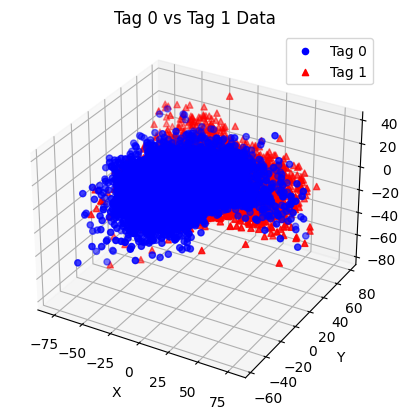

In [ ]:
import matplotlib.pyplot as plt

file_path = '/content/received_data.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

data_0 = [(float(entry.split('(')[1].split(',')[0]),
           float(entry.split(',')[1]),
           float(entry.split(',')[2].split(')')[0]))
          for entry in lines if entry.startswith('0')]

data_1 = [(float(entry.split('(')[1].split(',')[0]),
           float(entry.split(',')[1]),
           float(entry.split(',')[2].split(')')[0]))
          for entry in lines if entry.startswith('1')]

x_0, y_0, z_0 = zip(*data_0) if data_0 else ([], [], [])
x_1, y_1, z_1 = zip(*data_1) if data_1 else ([], [], [])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_0, y_0, z_0, c='blue', marker='o', label='Tag 0')
ax.scatter(x_1, y_1, z_1, c='red', marker='^', label='Tag 1')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Tag 0 vs Tag 1 Data')

ax.legend()

plt.show()


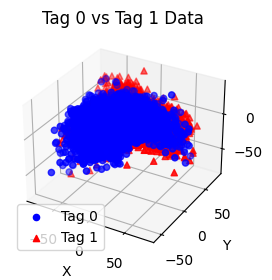

Predicted tag: 0


In [13]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import joblib

file_path = '/content/received_data.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

data_0 = [(float(entry.split('(')[1].split(',')[0]),
           float(entry.split(',')[1]),
           float(entry.split(',')[2].split(')')[0]))
          for entry in lines if entry.startswith('0')]

data_1 = [(float(entry.split('(')[1].split(',')[0]),
           float(entry.split(',')[1]),
           float(entry.split(',')[2].split(')')[0]))
          for entry in lines if entry.startswith('1')]

x_0, y_0, z_0 = zip(*data_0) if data_0 else ([], [], [])
x_1, y_1, z_1 = zip(*data_1) if data_1 else ([], [], [])

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')

ax.scatter(x_0, y_0, z_0, c='blue', marker='o', label='Tag 0')
ax.scatter(x_1, y_1, z_1, c='red', marker='^', label='Tag 1')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Tag 0 vs Tag 1 Data')

ax.legend()

plt.show()

features = np.array(data_0 + data_1)
labels = np.array([0] * len(data_0) + [1] * len(data_1))

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)

model_filename = 'random_forest_model.joblib'
joblib.dump(rf_classifier, model_filename)

loaded_model = joblib.load(model_filename)

new_data_point = np.array([[0.1, 0.2, 0.3]])  # Replace with your actual data
prediction = loaded_model.predict(new_data_point)
print(f"Predicted tag: {prediction[0]}")


In [ ]:
import time

# Load the model in another Python program
loaded_model = joblib.load(model_filename)

new_data_point = np.array([[0.1, 0.2, 0.3]])

start_time = time.time()
prediction = loaded_model.predict(new_data_point)
inference_time = time.time() - start_time
print(f"Inference time: {inference_time} seconds")

Inference time: 0.0023751258850097656 seconds


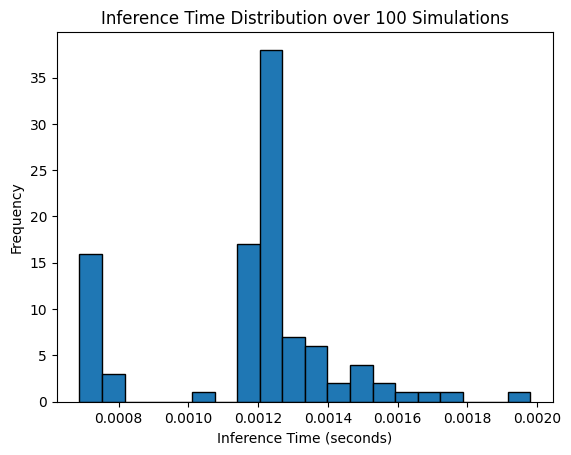

Average Inference Time over 100 simulations: 0.0011814975738525392 seconds


In [ ]:
import time
import numpy as np
import joblib
import matplotlib.pyplot as plt

loaded_model = joblib.load(model_filename)

num_simulations = 100

inference_times = []

for _ in range(num_simulations):
    new_data_point = np.random.rand(1, 3)

    start_time = time.time()
    prediction = loaded_model.predict(new_data_point)
    inference_time = time.time() - start_time

    inference_times.append(inference_time)

plt.hist(inference_times, bins=20, edgecolor='black')
plt.xlabel('Inference Time (seconds)')
plt.ylabel('Frequency')
plt.title(f'Inference Time Distribution over {num_simulations} Simulations')
plt.show()

average_inference_time = np.mean(inference_times)
print(f"Average Inference Time over {num_simulations} simulations: {average_inference_time} seconds")


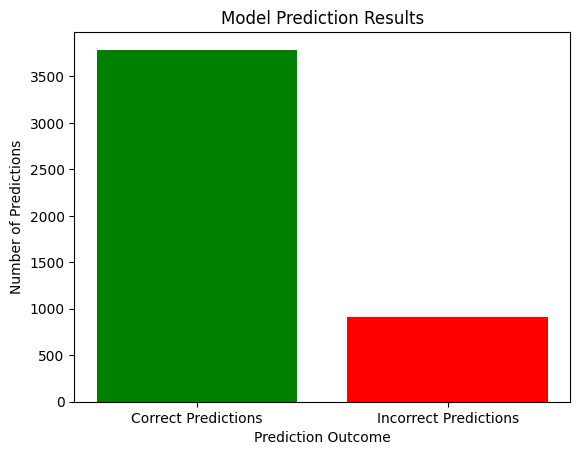

Overall Accuracy: 80.57%


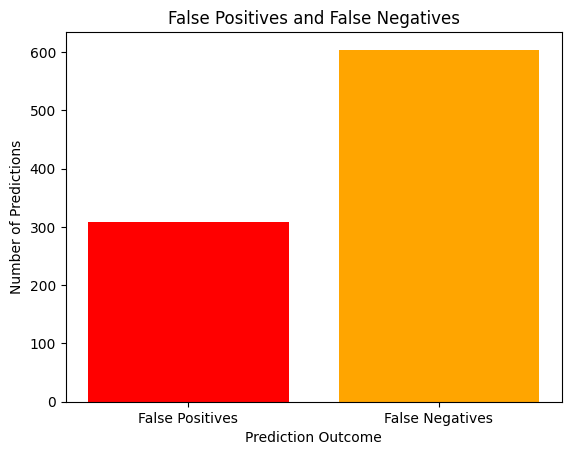

In [ ]:
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

loaded_model = joblib.load(model_filename)

file_path = '/content/received_data (1).txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

data = [(int(entry.split('(')[0]),
         float(entry.split('(')[1].split(',')[0]),
         float(entry.split(',')[1]),
         float(entry.split(',')[2].split(')')[0]))
        for entry in lines]

tags, x, y, z = zip(*data)

features = np.array(list(zip(x, y, z)))

predicted_tags = loaded_model.predict(features)

accuracy = accuracy_score(tags, predicted_tags) * 100

correct_predictions = np.sum(tags == predicted_tags)
incorrect_predictions = len(tags) - correct_predictions

labels = ['Correct Predictions', 'Incorrect Predictions']
values = [correct_predictions, incorrect_predictions]

plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Prediction Outcome')
plt.ylabel('Number of Predictions')
plt.title('Model Prediction Results')
plt.show()

print(f"Overall Accuracy: {accuracy:.2f}%")

conf_matrix = confusion_matrix(tags, predicted_tags)

false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]

labels = ['False Positives', 'False Negatives']
values = [false_positives, false_negatives]

plt.bar(labels, values, color=['red', 'orange'])
plt.xlabel('Prediction Outcome')
plt.ylabel('Number of Predictions')
plt.title('False Positives and False Negatives')
plt.show()


      Actual Tags  Predicted Tags
0               1               0
1               0               0
2               0               0
3               0               0
4               0               1
...           ...             ...
4695            0               0
4696            0               0
4697            0               0
4698            0               0
4699            0               0

[4700 rows x 2 columns]


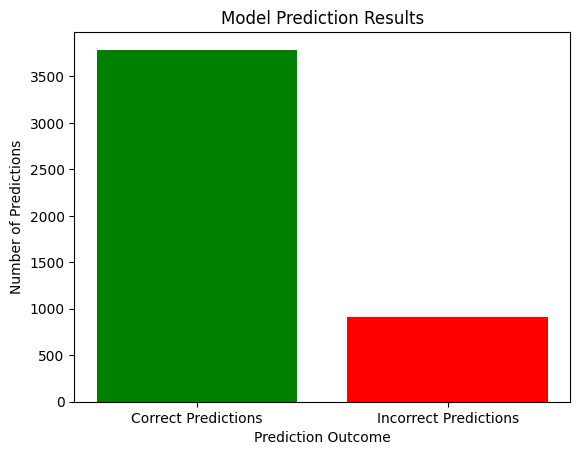

Overall Accuracy: 80.57%


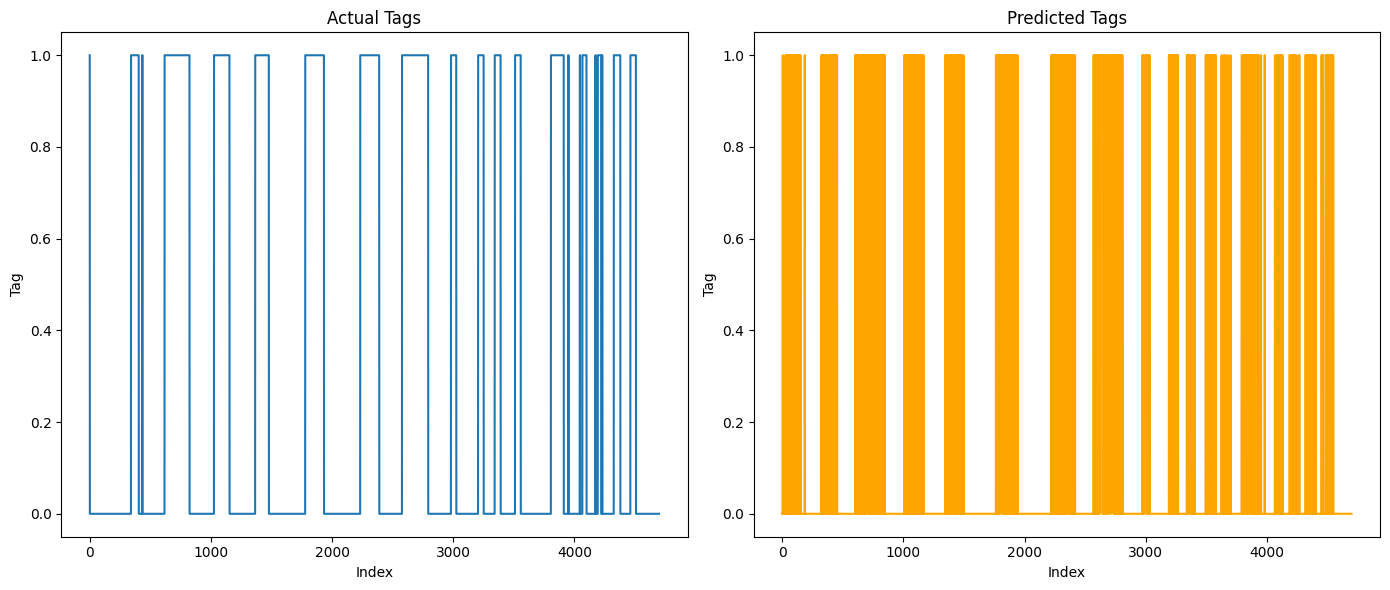

In [ ]:
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

loaded_model = joblib.load(model_filename)

file_path = '/content/received_data (1).txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

data = [(int(entry.split('(')[0]),
         float(entry.split('(')[1].split(',')[0]),
         float(entry.split(',')[1]),
         float(entry.split(',')[2].split(')')[0]))
        for entry in lines]

tags, x, y, z = zip(*data)

features = np.array(list(zip(x, y, z)))

predicted_tags = loaded_model.predict(features)

df = pd.DataFrame({'Actual Tags': tags, 'Predicted Tags': predicted_tags})
print(df)

accuracy = accuracy_score(tags, predicted_tags) * 100

correct_predictions = np.sum(tags == predicted_tags)
incorrect_predictions = len(tags) - correct_predictions

labels = ['Correct Predictions', 'Incorrect Predictions']
values = [correct_predictions, incorrect_predictions]

plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Prediction Outcome')
plt.ylabel('Number of Predictions')
plt.title('Model Prediction Results')
plt.show()

print(f"Overall Accuracy: {accuracy:.2f}%")

conf_matrix = confusion_matrix(tags, predicted_tags)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(tags, label='Actual Tags')
plt.title('Actual Tags')
plt.xlabel('Index')
plt.ylabel('Tag')

plt.subplot(1, 2, 2)
plt.plot(predicted_tags, label='Predicted Tags', color='orange')
plt.title('Predicted Tags')
plt.xlabel('Index')
plt.ylabel('Tag')

plt.tight_layout()
plt.show()


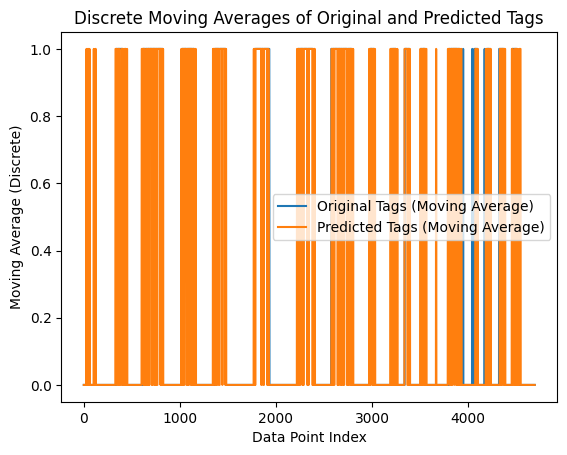

Overall Accuracy (Discrete Moving Averages): 82.99%


In [ ]:
import joblib
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

loaded_model = joblib.load(model_filename)

file_path = '/content/received_data (1).txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

data = [(int(entry.split('(')[0]),
         float(entry.split('(')[1].split(',')[0]),
         float(entry.split(',')[1]),
         float(entry.split(',')[2].split(')')[0]))
        for entry in lines]

tags, x, y, z = zip(*data)

features = list(zip(x, y, z))

predicted_tags = loaded_model.predict(features)

window_size = 5
original_tags_avg = pd.Series(tags).rolling(window=window_size).mean().dropna().values
predicted_tags_avg = pd.Series(predicted_tags).rolling(window=window_size).mean().dropna().values

threshold = 0.5
original_tags_avg_discrete = [1 if avg >= threshold else 0 for avg in original_tags_avg]
predicted_tags_avg_discrete = [1 if avg >= threshold else 0 for avg in predicted_tags_avg]

plt.plot(original_tags_avg_discrete, label='Original Tags (Moving Average)')
plt.plot(predicted_tags_avg_discrete, label='Predicted Tags (Moving Average)')
plt.xlabel('Data Point Index')
plt.ylabel('Moving Average (Discrete)')
plt.title('Discrete Moving Averages of Original and Predicted Tags')
plt.legend()
plt.show()

accuracy_avg_discrete = accuracy_score(original_tags_avg_discrete, predicted_tags_avg_discrete) * 100
print(f"Overall Accuracy (Discrete Moving Averages): {accuracy_avg_discrete:.2f}%")


In [ ]:
import joblib
from sklearn.metrics import accuracy_score
import pandas as pd

loaded_model = joblib.load(model_filename)

with open(file_path, 'r') as file:
    lines = file.readlines()

data = [(int(entry.split('(')[0]),
         float(entry.split('(')[1].split(',')[0]),
         float(entry.split(',')[1]),
         float(entry.split(',')[2].split(')')[0]))
        for entry in lines]

tags, x, y, z = zip(*data)

features = list(zip(x, y, z))

predicted_tags = loaded_model.predict(features)

for original, predicted in zip(tags, predicted_tags):
    print(f"Original Tag: {original}, Predicted Tag: {predicted}")

accuracy = accuracy_score(tags, predicted_tags) * 100
print(f"Overall Accuracy: {accuracy:.2f}%")


Original Tag: 1, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 1
Original Tag: 0, Predicted Tag: 1
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 0
Original Tag: 0, Predicted Tag: 1
Original Tag: 

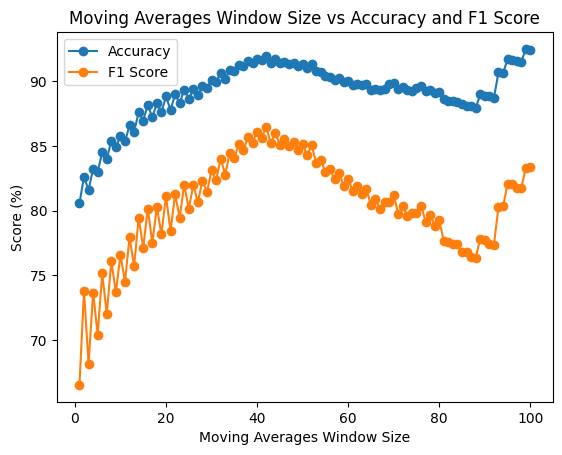

In [ ]:
import joblib
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

loaded_model = joblib.load(model_filename)

file_path = '/content/received_data (1).txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

data = [(int(entry.split('(')[0]),
         float(entry.split('(')[1].split(',')[0]),
         float(entry.split(',')[1]),
         float(entry.split(',')[2].split(')')[0]))
        for entry in lines]

tags, x, y, z = zip(*data)

features = list(zip(x, y, z))

window_sizes = list(range(1, 101))

accuracies = []
f1_scores = []

for window_size in window_sizes:
    predicted_tags = loaded_model.predict(features)

    original_tags_avg = pd.Series(tags).rolling(window=window_size).mean().dropna().values
    predicted_tags_avg = pd.Series(predicted_tags).rolling(window=window_size).mean().dropna().values

    threshold = 0.5
    original_tags_avg_discrete = [1 if avg >= threshold else 0 for avg in original_tags_avg]
    predicted_tags_avg_discrete = [1 if avg >= threshold else 0 for avg in predicted_tags_avg]

    accuracy_avg_discrete = accuracy_score(original_tags_avg_discrete, predicted_tags_avg_discrete) * 100
    f1_avg_discrete = f1_score(original_tags_avg_discrete, predicted_tags_avg_discrete) * 100

    accuracies.append(accuracy_avg_discrete)
    f1_scores.append(f1_avg_discrete)

plt.plot(window_sizes, accuracies, marker='o', label='Accuracy')
plt.xlabel('Moving Averages Window Size')
plt.ylabel('Accuracy (%)')
plt.title('Moving Averages Window Size vs Accuracy')

plt.plot(window_sizes, f1_scores, marker='o', label='F1 Score')
plt.xlabel('Moving Averages Window Size')
plt.ylabel('Score (%)')
plt.title('Moving Averages Window Size vs Accuracy and F1 Score')

plt.legend()
plt.show()


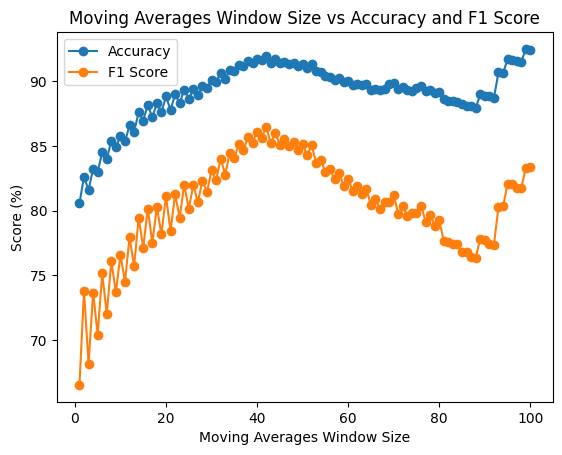

Highest Accuracy: 92.50% at Window Size: 99


In [ ]:
import joblib
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

loaded_model = joblib.load(model_filename)

file_path = '/content/received_data (1).txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

data = [(int(entry.split('(')[0]),
         float(entry.split('(')[1].split(',')[0]),
         float(entry.split(',')[1]),
         float(entry.split(',')[2].split(')')[0]))
        for entry in lines]

tags, x, y, z = zip(*data)

features = list(zip(x, y, z))

window_sizes = list(range(1, 101))

accuracies = []
f1_scores = []

for window_size in window_sizes:
    predicted_tags = loaded_model.predict(features)

    original_tags_avg = pd.Series(tags).rolling(window=window_size).mean().dropna().values
    predicted_tags_avg = pd.Series(predicted_tags).rolling(window=window_size).mean().dropna().values

    threshold = 0.5
    original_tags_avg_discrete = [1 if avg >= threshold else 0 for avg in original_tags_avg]
    predicted_tags_avg_discrete = [1 if avg >= threshold else 0 for avg in predicted_tags_avg]

    accuracy_avg_discrete = accuracy_score(original_tags_avg_discrete, predicted_tags_avg_discrete) * 100
    f1_avg_discrete = f1_score(original_tags_avg_discrete, predicted_tags_avg_discrete) * 100

    accuracies.append(accuracy_avg_discrete)
    f1_scores.append(f1_avg_discrete)

plt.plot(window_sizes, accuracies, marker='o', label='Accuracy')
plt.xlabel('Moving Averages Window Size')
plt.ylabel('Accuracy (%)')
plt.title('Moving Averages Window Size vs Accuracy')

plt.plot(window_sizes, f1_scores, marker='o', label='F1 Score')
plt.xlabel('Moving Averages Window Size')
plt.ylabel('Score (%)')
plt.title('Moving Averages Window Size vs Accuracy and F1 Score')

plt.legend()
plt.show()
